In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
print('Tensorflow Version : ', tf.__version__)

Tensorflow Version :  1.12.0


In [3]:
mnist=input_data.read_data_sets('data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [7]:
def print_np(x):
    print(x.shape)
    print('value look like \n',x)

In [8]:
print_np(mnist.train.images)
print_np(mnist.train.labels)

(55000, 784)
value look like 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(55000, 10)
value look like 
 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [9]:
print_np(mnist.validation.images)
print_np(mnist.validation.labels)

(5000, 784)
value look like 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(5000, 10)
value look like 
 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [10]:
mnist.train.images.shape

(55000, 784)

In [16]:
ntrain=mnist.train.images.shape[0]
nsample=3
randidx=np.random.randint(ntrain,size=nsample)
randidx

array([ 5215, 21844, 43050])

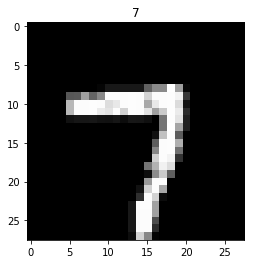

In [41]:
for i in randidx:
    imgvec=mnist.train.images[i,:]
    labelvec=mnist.train.labels[i,:]
    img=imgvec.reshape(28,28)
    label=np.argmax(labelvec)
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.title(label)

In [19]:
np.argmax(mnist.train.labels[randidx[0],:])

7

In [42]:
ntrain=10
randindices=np.random.permutation(ntrain)
print(randindices)

[9 8 3 6 0 7 5 4 1 2]


In [43]:
ntrain=10
nbatch=4
niter=ntrain // nbatch + 1
for i in range(niter):
    currindices=randindices[i*nbatch:(i+1)*nbatch]
    print('iter',i,'batch index : ', currindices)
    
    xbatch=mnist.train.images[currindices,:]
    ybatch=mnist.train.labels[currindices,:]
    print('xbatch : ',xbatch.shape)
    print('ybatch : ',ybatch.shape)

iter 0 batch index :  [9 8 3 6]
xbatch :  (4, 784)
ybatch :  (4, 10)
iter 1 batch index :  [0 7 5 4]
xbatch :  (4, 784)
ybatch :  (4, 10)
iter 2 batch index :  [1 2]
xbatch :  (2, 784)
ybatch :  (2, 10)
